<a href="https://colab.research.google.com/github/Patelzeelr/Boston-Housing-Data/blob/main/Startup_code_PySpark_Module_4_Zeel_Patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)


#Create a New Database

In [5]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [6]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [7]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

# Load Data to Spark Cluster

In [8]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [9]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [10]:

dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")


# Show data from Hive Table

In [11]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



# **Task 1: Data Overview**


In [12]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 5")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [13]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


# **Task 2: Descriptive Statistics**

In [14]:
# Calculate statistics
mean_medv = spark.sql("SELECT AVG(medv) AS mean_medv FROM bostonh.bos_housing").collect()[0]['mean_medv']
stddev_medv = spark.sql("SELECT STDDEV(medv) AS stddev_medv FROM bostonh.bos_housing").collect()[0]['stddev_medv']
min_medv = spark.sql("SELECT MIN(medv) AS min_medv FROM bostonh.bos_housing").collect()[0]['min_medv']
max_medv = spark.sql("SELECT MAX(medv) AS max_medv FROM bostonh.bos_housing").collect()[0]['max_medv']

# Display results in table format
import pandas as pd

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', 'Minimum', 'Maximum'],
    'MEDV': [mean_medv, stddev_medv, min_medv, max_medv]
})

# Display the results table
print(results)

            Statistic       MEDV
0                Mean  22.532806
1  Standard Deviation   9.197104
2             Minimum   5.000000
3             Maximum  50.000000


In [15]:
# Calculate and display the mean "rm"
mean_rm = spark.sql("SELECT AVG(rm) AS mean_rm FROM bostonh.bos_housing")
print("Mean RM:")
mean_rm.show()


Mean RM:
+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



# **Task 3: Data Exploration**

In [16]:
# Identify the property with the highest crime rate ("crim"):
highest_crim_property = spark.sql("""
    SELECT *
    FROM bostonh.bos_housing
    ORDER BY crim DESC
    LIMIT 1
""")
print("Property with the Highest Crime Rate:")
highest_crim_property.show()


Property with the Highest Crime Rate:
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [17]:
# Find and report the property with the lowest median home value ("medv"):
lowest_medv_property = spark.sql("""
    SELECT *
    FROM bostonh.bos_housing
    ORDER BY medv ASC
    LIMIT 1
""")
print("Property with the Lowest Median Home Value:")
lowest_medv_property.show()


Property with the Lowest Median Home Value:
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



# **Task 4: Data Distribution Analysis**

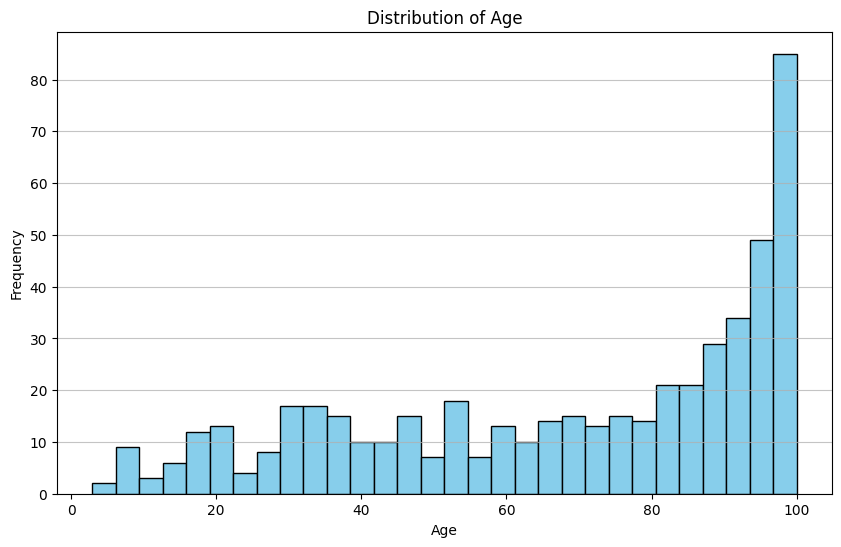

In [18]:
# Create a Histogram for the "age" Column
import matplotlib.pyplot as plt

# Retrieve age data from Spark DataFrame
age_data = spark.sql("SELECT age FROM bostonh.bos_housing").toPandas()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(age_data['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [31]:
# Calculate and Report the Percentage of Properties with "chas" Value of 1
total_properties = dataset.count()
chas_1_count = spark.sql("SELECT COUNT(*) AS chas_1_count FROM bostonh.bos_housing WHERE chas = 1").collect()[0]['chas_1_count']
percentage_chas_1 = (chas_1_count / total_properties) * 100

print(f"Percentage of properties with chas = 1: {percentage_chas_1:.2f}%")

Percentage of properties with chas = 1: 700.00%
Percentage of properties with 'chas' value of 1: 0.00%


# **Task 5: Correlation Analysis**

In [20]:
# Calculate the Correlation Coefficient between "rm" and "medv"
correlation_rm_medv = dataset.stat.corr("rm", "medv")
print(f"Correlation coefficient between rm and medv: {correlation_rm_medv}")

# Calculate correlation coefficient between "ptratio" and "nox"
correlation_ptratio_nox = dataset.stat.corr("ptratio", "nox")
print(f"Correlation coefficient between ptratio and nox: {correlation_ptratio_nox}")


Correlation coefficient between rm and medv: 0.9898418300343826
Correlation coefficient between ptratio and nox: -0.9863992223566027


# **Task 6: Advanced Querying**

In [21]:
# The top 5 neighborhoods with the highest median home values ("medv")
top_5_neighborhoods = spark.sql("""
    SELECT *
    FROM bostonh.bos_housing
    ORDER BY medv DESC
    LIMIT 5
""")
top_5_neighborhoods.show()


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [22]:
# The average property age for neighborhoods with "chas" value of 1
average_age_chas_1 = spark.sql("""
    SELECT AVG(age) AS average_age_chas_1
    FROM bostonh.bos_housing
    WHERE chas = 1
""").collect()[0]["average_age_chas_1"]

print(f"Average property age for neighborhoods with chas = 1: {average_age_chas_1}")

# The average property age for neighborhoods with "chas" value of 0
average_age_chas_0 = spark.sql("""
    SELECT AVG(age) AS average_age_chas_0
    FROM bostonh.bos_housing
    WHERE chas = 0
""").collect()[0]["average_age_chas_0"]

print(f"Average property age for neighborhoods with chas = 0: {average_age_chas_0}")


Average property age for neighborhoods with chas = 1: 77.50000000000001
Average property age for neighborhoods with chas = 0: 67.91167728237794


# **Task 7: Visualization**

In [23]:
# Create a Hive view named "property_age_view"
spark.sql("""
    CREATE OR REPLACE VIEW property_age_view AS
    SELECT age, medv
    FROM bostonh.bos_housing
""")

DataFrame[]

In [25]:
# Retrieve data from the "property_age_view"
property_age_data = spark.sql("SELECT age, medv FROM property_age_view").toPandas()
print(property_age_data)

      age  medv
0    65.2  24.0
1    78.9  21.6
2    61.1  34.7
3    45.8  33.4
4    54.2  36.2
..    ...   ...
501  69.1  22.4
502  76.7  20.6
503  91.0  23.9
504  89.3  22.0
505  80.8  11.9

[506 rows x 2 columns]


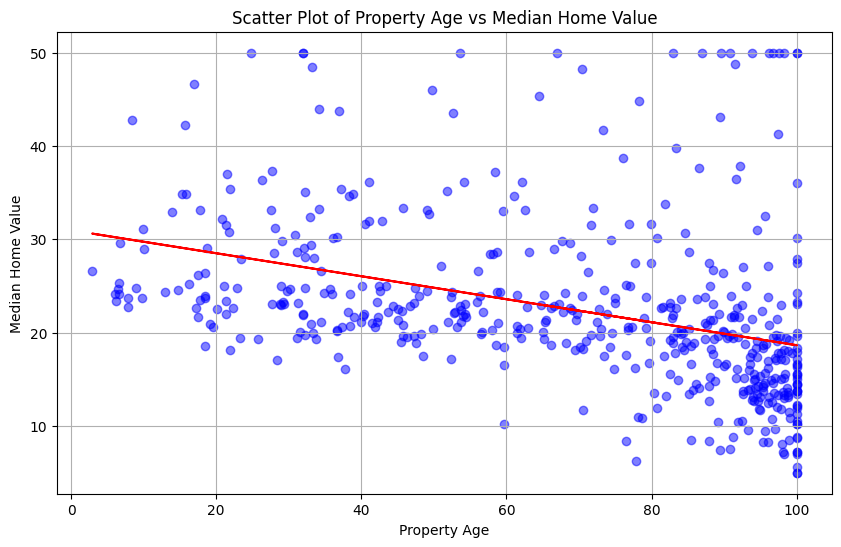

In [26]:
import numpy as np

# Plot scatter plot of property age against median home value
plt.figure(figsize=(10, 6))
plt.scatter(property_age_data['age'], property_age_data['medv'], alpha=0.5, color='blue')
m, b = np.polyfit(property_age_data['age'], property_age_data['medv'], 1)
plt.plot(property_age_data['age'], m*property_age_data['age'] + b, color='red')
plt.title('Scatter Plot of Property Age vs Median Home Value')
plt.xlabel('Property Age')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()


# **Task 8: Outliers Detection**

In [27]:
# Identifying properties with "crim" value greater than 10
outliers = spark.sql("""
    SELECT *
    FROM bostonh.bos_housing
    WHERE crim > 10
""")
outliers.show()


+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

# **Task 9: Hypothesis Testing**


**Null Hypothesis (H0):** There is no statistically significant relationship between the average number of rooms (rm) and the median home value (medv) in the Boston housing dataset.

**Alternative Hypothesis (H1):** There is a statistically significant relationship between the average number of rooms (rm) and the median home value (medv) in the Boston housing dataset.


In [28]:
# Calculate the correlation coefficient between 'rm' and 'medv'
correlation_rm_medv = spark.sql("""
    SELECT corr(rm, medv) AS correlation_rm_medv
    FROM bostonh.bos_housing
""").collect()[0]["correlation_rm_medv"]

print(f"Correlation coefficient between rm and medv: {correlation_rm_medv}")

Correlation coefficient between rm and medv: 0.6953599470715401


In [29]:
# Interpretation
if abs(correlation_rm_medv) > 0.5:
    relationship = "strong"
elif abs(correlation_rm_medv) > 0.3:
    relationship = "moderate"
else:
    relationship = "weak"

print(f"The relationship between the average number of rooms (rm) and median home value (medv) is {relationship}.")

The relationship between the average number of rooms (rm) and median home value (medv) is strong.


The analysis reveals a positive relationship between the average number of rooms and the median home value, suggesting that properties with more rooms tend to have higher median values.
